# Model optimization for 24 hours weather forecast

* Montior the trend of loss function over epoch for training and validating datasets.
* Default features refer to fourteen attributes with numeric values.
* Embedded features are created after embeddeing the categorical data such as month, day, year, and time. Although they can be treated as numeric values, the performance might not be great due to the analogy they created with numeric representation. 

## Gated Recurrent Model (GRU)
- Multi layer model
- 0.01 for dropout and recurrent dropout

### GRU multi-layer model with default and embedded features

```python3
$ python3 ./GRU.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

font      = {'family':'arial', 'style':'normal', 'size':18}
axis_font = {'family':'arial', 'style':'normal', 'size':18}
plt.rc('font', **font)

In [2]:
import pandas as pd

pd_data = pd.read_csv("./data/GRU_MLayer_eDefault.log")
pd_data.head()

,epoch,loss,val_loss
0,1,0.28414,0.13256
1,2,0.14911,0.14045
2,3,0.14040,0.12985
3,4,0.13675,0.12993
4,5,0.13020,0.13310


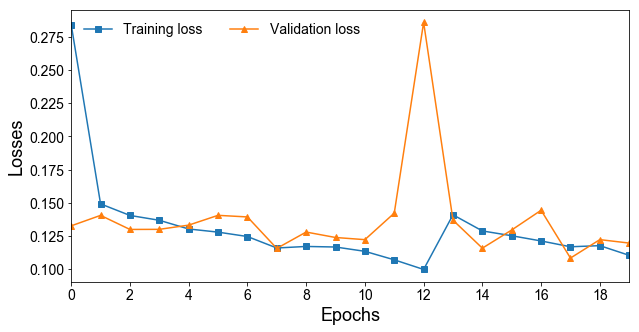

In [3]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
pd_data.loss.plot(style='s-', label='Training loss')
pd_data.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_data["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### GRU multi-layer model with default feature

```python3
$ python3 ./GRU.py -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [4]:
pd_data = pd.read_csv("./data/GRU_MLayer_Default.log")
pd_data.head()

,epoch,loss,val_loss
0,1,0.27715,0.16245
1,2,0.16364,0.16230
2,3,0.15934,0.16460
3,4,0.15818,0.16400
4,5,0.15343,0.16166


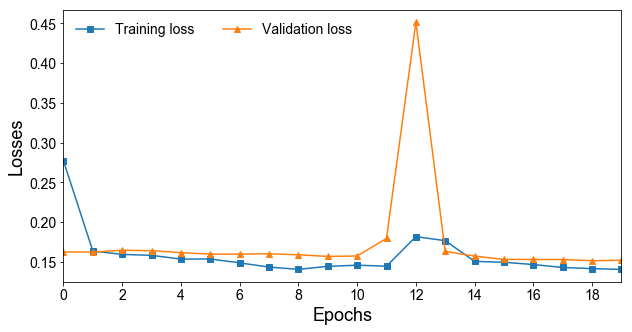

In [5]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
pd_data.loss.plot(style='s-', label='Training loss')
pd_data.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_data["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

## Long short-term memory (LSTM)
- Multi layer model
- 0.03 for dropout and recurrent dropout

### LSTM multi-layer model with default and embedded features

```python3
$ python3 ./LSTM.py -e -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [7]:
pd_LSTM = pd.read_csv("./data/LSTM_MLayer_eDefault.log")
pd_LSTM.head()

,epoch,loss,val_loss
0,1,0.42222,0.13615
1,2,0.15163,0.13549
2,3,0.13894,0.13598
3,4,0.13664,0.13696
4,5,0.13117,0.15384


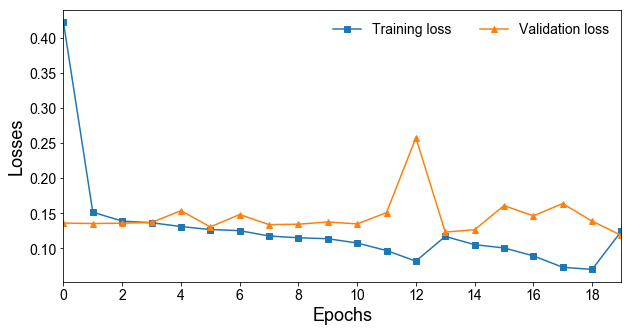

In [8]:
fig = plt.figure(figsize=(10, 5))
pd_LSTM.loss.plot(style='s-', label='Training loss')
pd_LSTM.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_LSTM["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### LSTM multi-layer model with default feature

```python3
$ python3 ./LSTM.py -i ./../data/jena_climate_2009_2016.csv

Where,
-e: merge embedded columns
-p: hours for prediction (default=24 hours)
```

In [9]:
pd_data = pd.read_csv("./data/LSTM_MLayer_Default.log")
pd_data.head()

,epoch,loss,val_loss
0,1,0.52005,0.20794
1,2,0.16656,0.17415
2,3,0.15560,0.16878
3,4,0.15528,0.16576
4,5,0.15033,0.16215


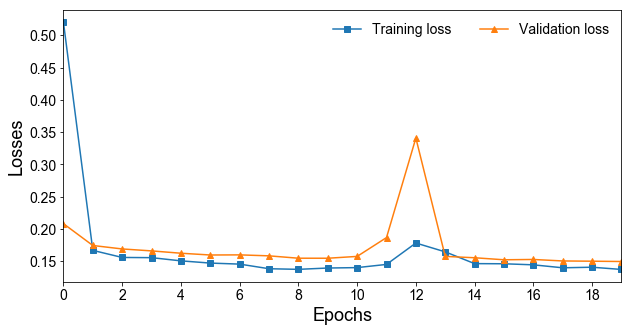

In [10]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
pd_data.loss.plot(style='s-', label='Training loss')
pd_data.val_loss.plot(style='^-', label='Validation loss')

ts_in_epochs = pd_data["epoch"].tolist()
ts_xlabels = np.arange(0, len(ts_in_epochs), 2)
plt.xticks(ts_xlabels, ts_xlabels, fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Epochs", axis_font)
plt.ylabel("Losses", axis_font)
plt.legend(ncol=2, frameon=False, fontsize=14)

### Remarks and Future Directions
- Mean square error are very close to each other for two datasets in all four cases.
- Notably, the error is very high at 12 epoch for validation dataset. 
- Apparently, error did not drop below 0.12 (with few excpetions), which also yielded the mean square error of 0.12 on test dataset.
- As a future direction, more data with the availability of computing resource can allow to explore the best parameters to improve the performance. 